In [29]:
import tensorflow as tf
from keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt

# Import Libraries
- TensorFlow and Keras for building the model.
- Matplotlib for visualizations.

In [30]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.mnist.load_data()

# Load and Preprocess Data
- Load MNIST dataset.
- Flatten and normalize images for training.

In [31]:
print(len(xtrain))
print(len(xtest))

60000
10000


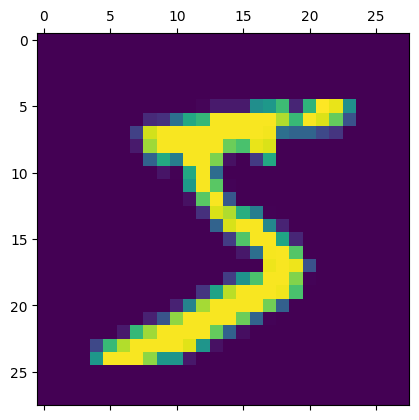

In [32]:
plt.matshow(xtrain[0])

In [33]:
print(xtrain.shape)
xtrain_flattend = xtrain.reshape(-1, 28*28).astype("float32") / 255.0
xtest_flattend = xtest.reshape(-1, 28*28).astype("float32") / 255.0

(60000, 28, 28)


In [34]:
xtrain.shape

(60000, 28, 28)

In [35]:
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

c:\Users\gidge\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Build Neural Network
- Input layer: 784 features (flattened image).
- Hidden layers: Dense layers with ReLU activation.
- Output layer: 10 classes with softmax activation.

In [36]:
history = model.fit(
    xtrain_flattend, ytrain,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)


Epoch 1/10
422/422 - 2s - 6ms/step - accuracy: 0.8649 - loss: 0.4639 - val_accuracy: 0.9565 - val_loss: 0.1500
Epoch 2/10
422/422 - 1s - 3ms/step - accuracy: 0.9426 - loss: 0.2008 - val_accuracy: 0.9662 - val_loss: 0.1123
Epoch 3/10
422/422 - 1s - 3ms/step - accuracy: 0.9567 - loss: 0.1481 - val_accuracy: 0.9723 - val_loss: 0.0920
Epoch 4/10
422/422 - 1s - 3ms/step - accuracy: 0.9662 - loss: 0.1130 - val_accuracy: 0.9735 - val_loss: 0.0846
Epoch 5/10
422/422 - 1s - 3ms/step - accuracy: 0.9725 - loss: 0.0929 - val_accuracy: 0.9752 - val_loss: 0.0840
Epoch 6/10
422/422 - 2s - 4ms/step - accuracy: 0.9759 - loss: 0.0811 - val_accuracy: 0.9763 - val_loss: 0.0779
Epoch 7/10
422/422 - 1s - 3ms/step - accuracy: 0.9793 - loss: 0.0694 - val_accuracy: 0.9760 - val_loss: 0.0727
Epoch 8/10
422/422 - 1s - 3ms/step - accuracy: 0.9814 - loss: 0.0583 - val_accuracy: 0.9768 - val_loss: 0.0721
Epoch 9/10
422/422 - 1s - 3ms/step - accuracy: 0.9843 - loss: 0.0514 - val_accuracy: 0.9790 - val_loss: 0.0707
E

# Train the Model
- Use Adam optimizer and cross-entropy loss.
- Train for 10 epochs with a batch size of 128.

In [37]:
test_loss, test_acc = model.evaluate(xtest_flattend, ytest)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9729 - loss: 0.0908

Test accuracy: 0.9769


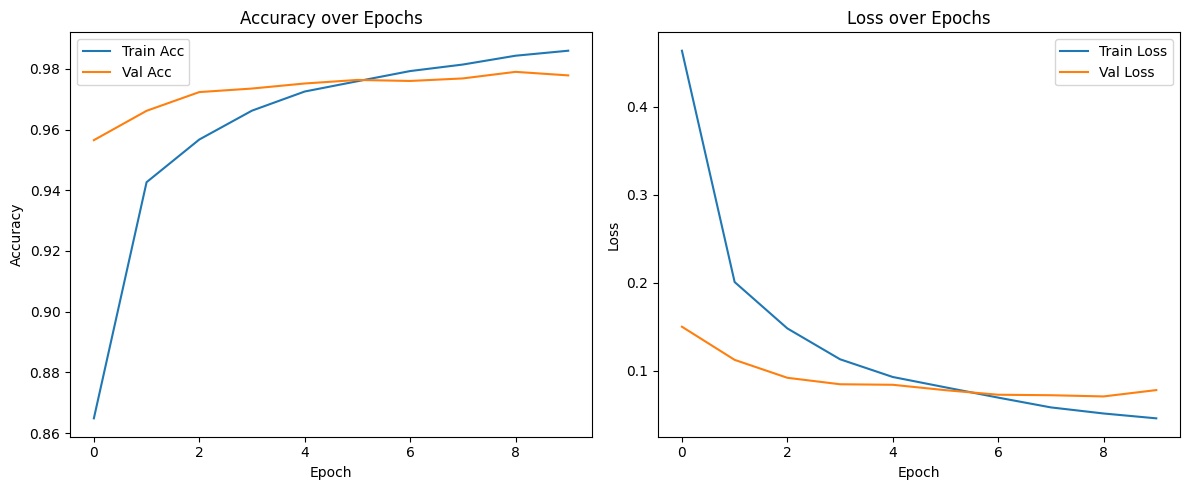

In [38]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate and Visualize Results
- Plot accuracy and loss over epochs.
- Display confusion matrix and classification report.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [40]:
y_pred_probs = model.predict(xtest_flattend)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\nClassification Report:\n")
print(classification_report(ytest, y_pred, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:

              precision    recall  f1-score   support

           0     0.9827    0.9867    0.9847       980
           1     0.9921    0.9921    0.9921      1135
           2     0.9777    0.9777    0.9777      1032
           3     0.9603    0.9822    0.9711      1010
           4     0.9885    0.9644    0.9763       982
           5     0.9883    0.9507    0.9691       892
           6     0.9782    0.9823    0.9802       958
           7     0.9786    0.9786    0.9786      1028
           8     0.9615    0.9733    0.9673       974
           9     0.9619    0.9762    0.9690      1009

    accuracy                         0.9769     10000
   macro avg     0.9770    0.9764    0.9766     10000
weighted avg     0.9770    0.9769    0.9769     10000



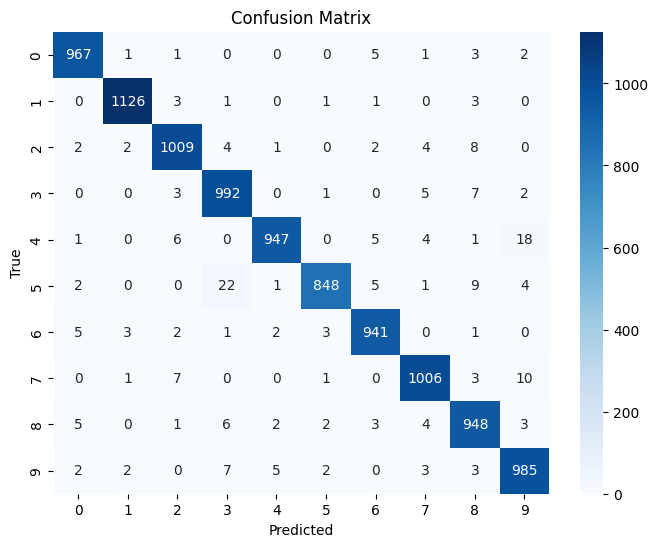

In [41]:
conf_matrix = confusion_matrix(ytest, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()